In [129]:
import numpy as np
import pandas as pd
from groq import Groq
import os
import time

In [159]:
response = pd.read_excel('../../dataframes/llama3-70B-OMIEC_RESPONSES.xlsx')
raw_data =  pd.read_excel('../../data/raw/OMIEC_07_08_24.xls')

In [162]:
raw_data['Abstract'][535]

"A new method for selective separation of wood components is presented. Based on Hansen's theory of solubility, ionic liquid (IL) 1-butyl-3-methylimidazolium bromine ([Bmin]Br) was mixed with aqueous ethanol. HBr the acid catalyst in the degradation of wood components, was found to form in situ by ion exchange between IL and organic acid. The hydrogen bonding capacity of the mixture was enhanced as the presence of IL, which led to the promotion of the solubilization of lignin and other products from carbohydrates hydrolysis. The data showed that, variations of the IL concentration caused cellulose to be separated from pine wood with a purity of more than 94%, or to be hydrolyzed and converted into saccharides together with hemicellulose. Because of the complete hydrolysis of hemicellulose, the cross-linked matrix of lignin and hemicellulose was destroyed, which led to the isolation of lignin with a high purity of about 93%."

In [163]:
result = pd.concat([response, raw_data], axis=1)
result.drop('index', axis=1, inplace=True)

In [164]:
def prepare_corpus(df):
    corpus = []
    for index, row in df.iterrows():
        for token in set(str(row['response']).replace('\n', ';').split(';')):
            corpus.append(token.strip().replace('/', "-").replace(":", "-"))
            
    return pd.Series(corpus)

In [165]:
corpus = prepare_corpus(result)
corpus = corpus[corpus != 'nan']
corpus = corpus[corpus != '']
corpus = corpus.reset_index(drop=True)

In [166]:
len(corpus)

324

In [167]:
np.unique(corpus[corpus.str.contains(r'PEDOT', regex=True)].values.tolist())

array(['EG-GOPS-PEDOT-PSS', 'PEDOT', 'PEDOT-Cl', 'PEDOT-PBA',
       'PEDOT-PDADMA-TFSI', 'PEDOT-PSS', 'PEDOT-PolyDADMA CF3SO3',
       'PEDOT-PolyDADMA Cl', 'PEDOT-PolyDADMA FSI',
       'PEDOT-PolyDADMA TFSI', 'PEDOT-PolyDADMA Tos', 'PEDOT-Tos',
       'PEDOT-b-PEG', 'PEO-PEDOT', 'PEO-PEDOT-KOTf', 'crys-PEDOT-PSS'],
      dtype='<U22')

In [168]:
"""replacements = {
    r'.*\s\(([^)]+)\)$': r'\1', # para polímeros que estão no formato 'nome_polímero (abreviação_polímero)', substitui pela abreviação apenas
    r'[Pp]oly\(3,4-ethylenedioxythiophene\)': 'PEDOT',
    r'\b[Pp]EDOT[-\s]?[Pp]oly\(?[0-9]*[-\s]*styrenesulfonate\)?\b': 'PEDOT-PSS',
    r'\b[Pp]EDOT\s*[-\s]*PSS\)?': 'PEDOT-PSS',
    r'\bPEDOT-PSS\)$': 'PEDOT-PSS',
    r'[Pp]olypyrrole': 'PPy',
    r'[Pp]olyethylenedioxythiophene': 'PEDOT',
    r'[Pp]olythiophene[s]?': 'PT',  
    r'[Pp]oly\((thiophene)\)': 'PT',
    r'[Pp]oly\(3-methylthiophene\)': 'P3MT',
    r'[Pp]oly\(3-hexylthiophene\)': 'P3HT',
    r'[Pp]oly\(3-hexylthiophene[-\d,]*diyl\)': 'P3HT'

}"""

items_to_remove = [r'(?i)\bmixed\b',
                   r'(?i)\bnone\b',
                   r'MIEC.*',
                   'based', 
                   r'[Pp]olymer',
                   r'OECT.*',
                   'conjug'
                   ]


In [169]:
'''for pattern, replacement in replacements.items():
    corpus = corpus.str.replace(pattern, replacement, regex=True, case=False)'''
    
for item in items_to_remove:
    corpus = corpus[~corpus.str.contains(item, regex=True)]

In [170]:
len(corpus)

316

In [171]:
len(corpus.unique())

209

In [172]:
corpus.value_counts().head(50)

PEDOT-PSS                 52
P3HT                      11
PEO                       11
PEDOT                     10
BEDT-TTF                   6
TTF-CA                     5
BEDO-TTF                   5
BBL                        3
PProDOT                    2
Homo-gDPP                  2
PANI                       2
PVA                        2
P-3O                       2
d-gdiPDI                   2
P1                         2
p(g2T-T)                   2
P3MEEET                    2
PTEO                       2
Nafion                     2
PTh                        2
pg2T-TT                    1
PANI-PSS                   1
EG-GOPS-PEDOT-PSS          1
EDOTS                      1
EDOTCOOH                   1
PEDOT-PolyDADMA FSI        1
PEDOT-PolyDADMA TFSI       1
PEDOT-PolyDADMA Tos        1
PEDOT-PolyDADMA Cl         1
[C(2)mpyr][FSI]            1
PEO-PEDOT-KOTf             1
PEDOT-PolyDADMA CF3SO3     1
PEO-PEDOT                  1
PDA                        1
ieCOF         

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_18252\1393773913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")


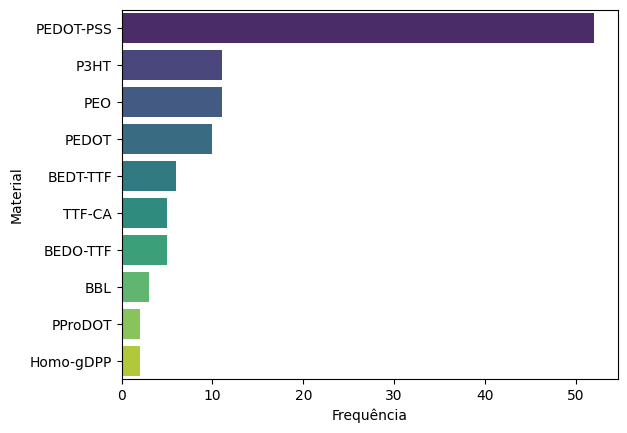

In [173]:
top_10_counts = corpus.value_counts().head(10)

# Plotando o histograma
sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")
plt.xlabel('Frequência')
plt.ylabel('Material')
plt.show()

Localizando os artigos em que aparecem os polímeros

In [174]:
for index, row in result.iterrows():    
    if not isinstance(row['response'], float) and  'PEDOT' in row['response']:
        print(row['response'], '\n', row['Abstract'], '\n' )

PEDOT; 
 Thin films of organic mixed ionic electronic conductors (OMIECs) constitute the functional layer in organic electrochemical transistors (OECTs), organic bioelectronic transducers and other ionic-electronic devices. The thin-film configuration constrains devices to be fabricated on impermeable substrates in the form of 2D microstructures with lateral electrodes to drive an electronic current through the thin film. In order to alleviate such constraints, novel OMIEC deposition methods are needed that produce alternatives to thin-film devices and that are compatible with permeable substrates and electronic transport in the vertical direction. Here OMIECs filled nanoporous membranes are introduced as functional layer in devices with mixed ionic electronic transport. Electropolymerization of ethylenedioxythiophene (EDOT) monomers is used to fabricate OMIEC filled nanochannels. Electronic and ionic transport through such nanochannels are investigated and modulation of electronic as 

In [144]:
result

,response,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,NaN,J,"Zhang, CH; Margotti, L; Decataldo, F; Piccioni...",NaN,NaN,NaN,"Zhang, Chenhong; Margotti, Lorenzo; Decataldo,...",NaN,NaN,Organic Mixed Ionic Electronic Conductor Nanoc...,...,NaN,Science & Technology - Other Topics; Materials...,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:001227571900001,0
1,NaN,J,"Dai, HJ; Yue, W",NaN,NaN,NaN,"Dai, Haojie; Yue, Wan",NaN,NaN,n-Type Organic Mixed Ionic-Electronic Conducto...,...,NaN,Materials Science,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:001193211400001,0
2,NaN,J,"Del Olmo, R; Casado, N; Olmedo-Martínez, JL; W...",NaN,NaN,NaN,"Del Olmo, Rafael; Casado, Nerea; Olmedo-Martin...",NaN,NaN,Mixed Ionic-Electronic Conductors Based on PED...,...,NaN,Polymer Science,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:000580020600001,0
3,NaN,J,"Kim, H; Won, Y; Song, HW; Kwon, Y; Jun, M; Oh, JH",NaN,NaN,NaN,"Kim, Hyunwook; Won, Yousang; Song, Hyun Woo; K...",NaN,NaN,Organic Mixed Ionic-Electronic Conductors for ...,...,NaN,Chemistry; Science & Technology - Other Topics...,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:001131799400001,0
4,NaN,J,"Bonafe, F; Decataldo, F; Cramer, T; Fraboni, B",NaN,NaN,NaN,"Bonafe, Filippo; Decataldo, Francesco; Cramer,...",NaN,NaN,Ionic Solvent Shell Drives Electroactuation in...,...,NaN,Chemistry; Science & Technology - Other Topics...,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:001176227200001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,NaN,J,"EICHHORN, H; OMIECZYN.G",NaN,NaN,NaN,"EICHHORN, H; OMIECZYN.G",NaN,NaN,CALCULATION OF TIME-DEPENDENT PRESSURE INCREAS...,...,NaN,Nuclear Science & Technology,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:A1970H320500003,0
871,NaN,J,"OMIECZYNSKI, DT",NaN,NaN,NaN,"OMIECZYNSKI, DT",NaN,NaN,SAFE ISOLATION OF COCCIDIOIDES-IMMITIS FROM CL...,...,NaN,Medical Laboratory Technology,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:A1970H687900002,0
872,NaN,J,"SWATEK, FE; OMIECZYNSKI, DT",NaN,NaN,NaN,"SWATEK, FE; OMIECZYNSKI, DT",NaN,NaN,ISOLATION AND IDENTIFICATION OF COCCIDIOIDES-I...,...,NaN,Mycology,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:A1970H445900014,0
873,NaN,J,"BURNS, RA; REED, WB; SWATEK, FE; OMIECZYN.DT",NaN,NaN,NaN,"BURNS, RA; REED, WB; SWATEK, FE; OMIECZYN.DT",NaN,NaN,FAMILIAL BENIGN CHRONIC PEMPHIGUS,...,NaN,Dermatology,NaN,NaN,NaN,NaN,NaN,2024-08-07,WOS:A19679851700005,0
